In [142]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler
from sklearn import metrics
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.neighbors import KNeighborsClassifier

In [143]:
data = pd.read_csv(r"C:\Users\sharm\Downloads\HepatitisCdata.csv")

In [144]:
data.dropna(inplace= True)

In [145]:
data["Category"].loc[data["Category"].isin(["1=Hepatitis",'2=Fibrosis','3=Cirrhosis'])] = 1
data["Category"].loc[data['Category'].isin(['0=Blood Donor',"0s=suspect Blood Donor"])] = 0 

C:\Users\sharm\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [146]:
data["Sex"] = data['Sex'].map({'m':1,'f':2})

In [147]:
data['Category']=data['Category'].astype(float)

In [148]:
data=data.drop('Unnamed: 0', axis=1)

In [149]:
X = data.drop("Category",axis=1)

In [150]:
y = data['Category']

In [151]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [152]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [153]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
LogisticRegressionScore = lr.score(x_test, y_test)
print(f'Accuracy of LogisticRegression: {LogisticRegressionScore}')

Accuracy of LogisticRegression: 0.9576271186440678


In [154]:
y_pred_lr = lr.predict(x_test)
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       101
         1.0       1.00      0.71      0.83        17

    accuracy                           0.96       118
   macro avg       0.98      0.85      0.90       118
weighted avg       0.96      0.96      0.95       118



In [155]:
KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)
KNeighborsClassifierScore = KNC.score(x_test, y_test)
print(f'Accuracy of KNC: {KNeighborsClassifierScore}')

Accuracy of KNC: 0.9322033898305084


In [156]:
y_pred_KNC = KNC.predict(x_test)
print(metrics.classification_report(y_test,y_pred_KNC))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       101
         1.0       1.00      0.53      0.69        17

    accuracy                           0.93       118
   macro avg       0.96      0.76      0.83       118
weighted avg       0.94      0.93      0.92       118



In [157]:
model = keras.Sequential([keras.layers.Dense(12,input_shape=(12,),activation='relu'),keras.layers.Dense(5,activation='softmax')])

model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal"),

(<keras.layers.core.dense.Dense at 0x17a3a871940>,)

In [158]:
history = model.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
15/15 [==============================] - 0s 701us/step - loss: 1.9015 - accuracy: 0.0616
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 1.7410 - accuracy: 0.1040
Epoch 3/100
15/15 [==============================] - 0s 671us/step - loss: 1.5923 - accuracy: 0.1783
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 1.4562 - accuracy: 0.3397
Epoch 5/100
15/15 [==============================] - 0s 754us/step - loss: 1.3288 - accuracy: 0.4968
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 1.2109 - accuracy: 0.6412
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 1.1028 - accuracy: 0.7792
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0011 - accuracy: 0.8577
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 0.9081 - accuracy: 0.8981
Epoch 10/100
15/15 [==============================] - 0s 503us/step - loss: 0.8228 - accuracy: 0.9257
E

15/15 [==============================] - 0s 673us/step - loss: 0.0461 - accuracy: 0.9894
Epoch 82/100
15/15 [==============================] - 0s 593us/step - loss: 0.0456 - accuracy: 0.9894
Epoch 83/100
15/15 [==============================] - 0s 685us/step - loss: 0.0449 - accuracy: 0.9894
Epoch 84/100
15/15 [==============================] - 0s 698us/step - loss: 0.0443 - accuracy: 0.9894
Epoch 85/100
15/15 [==============================] - 0s 466us/step - loss: 0.0437 - accuracy: 0.9894
Epoch 86/100
15/15 [==============================] - 0s 1ms/step - loss: 0.0431 - accuracy: 0.9894
Epoch 87/100
15/15 [==============================] - 0s 714us/step - loss: 0.0427 - accuracy: 0.9894
Epoch 88/100
15/15 [==============================] - 0s 660us/step - loss: 0.0422 - accuracy: 0.9894
Epoch 89/100
15/15 [==============================] - 0s 572us/step - loss: 0.0416 - accuracy: 0.9894
Epoch 90/100
15/15 [==============================] - 0s 604us/step - loss: 0.0412 - accuracy: 0.

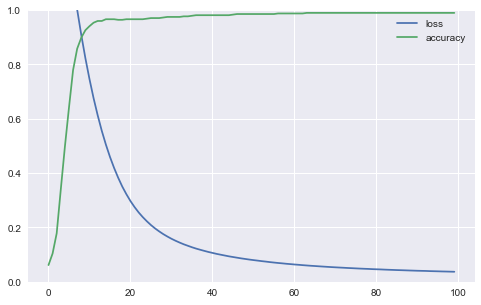

In [159]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [160]:
model = keras.Sequential([keras.layers.Dense(12,input_shape=(12,),activation='relu'),keras.layers.Dense(5,activation='softmax')])
model.compile(loss="MeanAbsoluteError",optimizer="adam",metrics=["mse","MAE"])
keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal"),

(<keras.layers.core.dense.Dense at 0x17a3cf8fe20>,)

In [161]:
history = model.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2497 - mse: 0.1106 - MAE: 0.2497
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2497 - mse: 0.1106 - MAE: 0.2497
Epoch 3/100
15/15 [==============================] - 0s 949us/step - loss: 0.2497 - mse: 0.1106 - MAE: 0.2497
Epoch 4/100
15/15 [==============================] - 0s 706us/step - loss: 0.2497 - mse: 0.1106 - MAE: 0.2497
Epoch 5/100
15/15 [==============================] - 0s 695us/step - loss: 0.2497 - mse: 0.1106 - MAE: 0.2497
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2497 - mse: 0.1106 - MAE: 0.2497
Epoch 7/100
15/15 [==============================] - 0s 686us/step - loss: 0.2497 - mse: 0.1106 - MAE: 0.2497
Epoch 8/100
15/15 [==============================] - 0s 905us/step - loss: 0.2497 - mse: 0.1106 - MAE: 0.2497
Epoch 9/100
15/15 [==============================] - 0s 717us/step - loss: 0.2497 - mse: 0.1106 - MAE: 0.2497
Epoch 10/100
15/

15/15 [==============================] - 0s 579us/step - loss: 0.2497 - mse: 0.1106 - MAE: 0.2497
Epoch 76/100
15/15 [==============================] - 0s 774us/step - loss: 0.2497 - mse: 0.1106 - MAE: 0.2497
Epoch 77/100
15/15 [==============================] - 0s 936us/step - loss: 0.2497 - mse: 0.1106 - MAE: 0.2497
Epoch 78/100
15/15 [==============================] - 0s 694us/step - loss: 0.2497 - mse: 0.1106 - MAE: 0.2497
Epoch 79/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2497 - mse: 0.1106 - MAE: 0.2497
Epoch 80/100
15/15 [==============================] - 0s 719us/step - loss: 0.2497 - mse: 0.1106 - MAE: 0.2497
Epoch 81/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2497 - mse: 0.1106 - MAE: 0.2497
Epoch 82/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2497 - mse: 0.1106 - MAE: 0.2497
Epoch 83/100
15/15 [==============================] - 0s 587us/step - loss: 0.2497 - mse: 0.1106 - MAE: 0.2497
Epoch 84/100
15/15 [

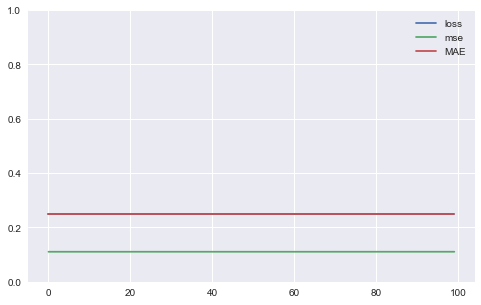

In [162]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [163]:
replace_dict = dict()
num_dict = dict()
i=0
for val in data['Category'].unique():
    replace_dict[val] = i
    num_dict[str(i)] = val
    i += 1

In [164]:
def predict(model,x):
    pred = model.predict(x)
    pred_test = np.array([np.argmax(pred[i]) for i in range(len(pred))])
    return pred_test

def plot_actual_vs_predicted(y_true,y_pred,title):
    cm = confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(7,7))
    sns.heatmap(cm,annot=True,fmt='g',xticklabels=num_dict.values(),yticklabels=num_dict.values())
    plt.title(title)
    plt.show()
    print("Classification Report")
    print(classification_report(y_true,y_pred))

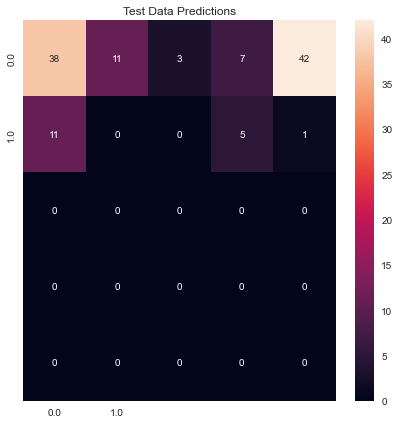

Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.38      0.51       101
         1.0       0.00      0.00      0.00        17
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

    accuracy                           0.32       118
   macro avg       0.16      0.08      0.10       118
weighted avg       0.66      0.32      0.43       118



C:\Users\sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [165]:
y_test_pred = predict(model,x_test)
plot_actual_vs_predicted(y_test,y_test_pred,"Test Data Predictions")

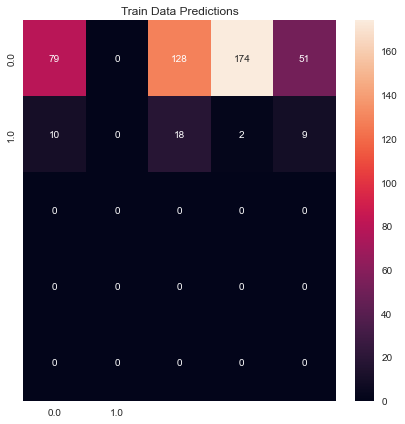

Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.18      0.30       432
         1.0       0.00      0.00      0.00        39
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

    accuracy                           0.17       471
   macro avg       0.18      0.04      0.06       471
weighted avg       0.81      0.17      0.28       471



C:\Users\sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sharm\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [141]:
y_train_pred = predict(model,x_train)
actual_vs_predicted(y_train,y_train_pred,"Train Data Predictions")